**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

2.Load the dataset into the Google Colab

In [ ]:
df=pd.read_csv("/content/abalone.csv")

In [ ]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

3. UNIVARIATE ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f199c3c5310>,
      dtype=object)

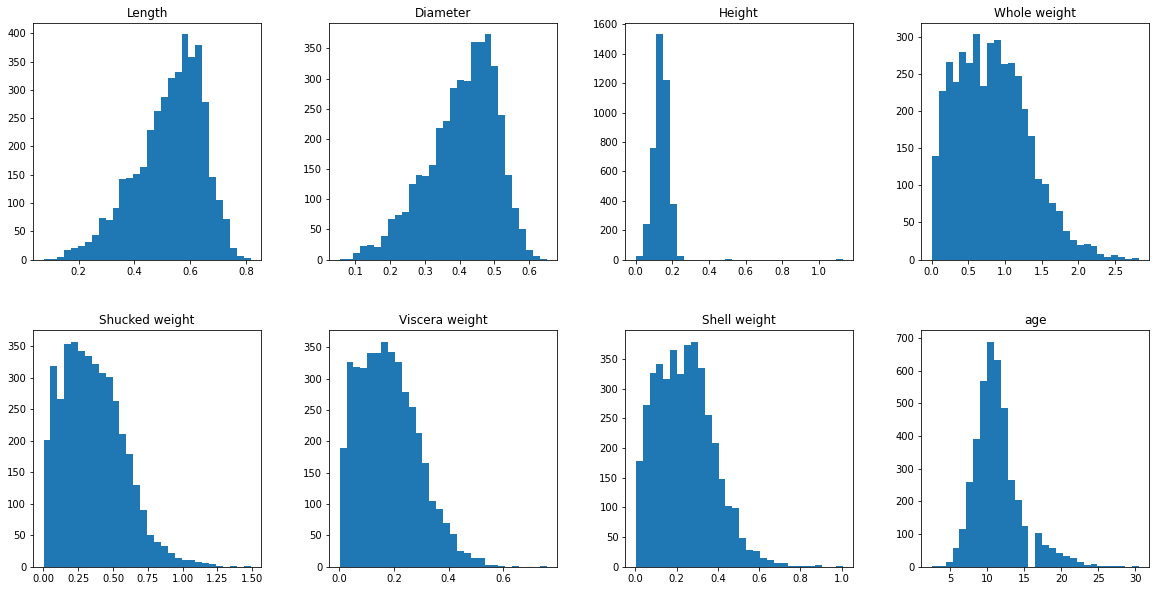

In [ ]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [ ]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


BIVARIATE ANALYSIS,MULTIVARIATE ANALYSIS

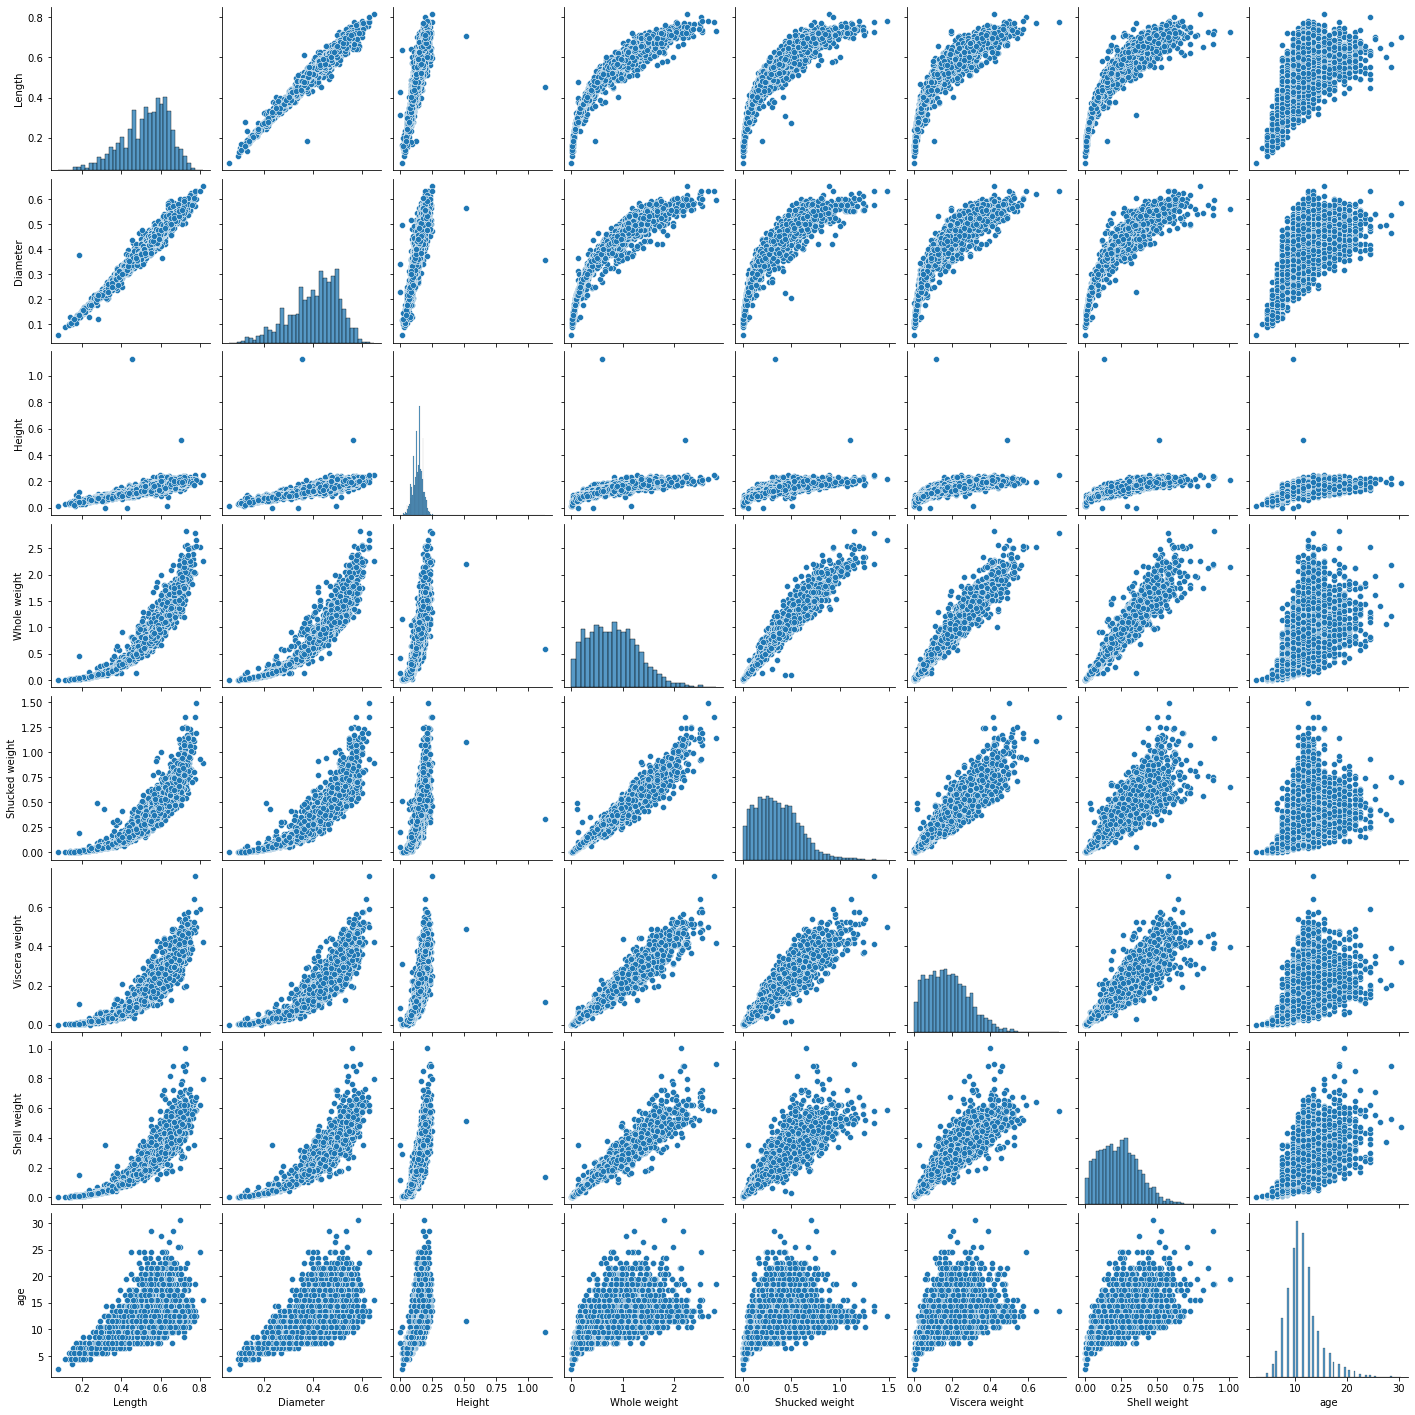

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])

4. Descriptive statistics 

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


5.Check for Missing Values

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

6. OUTLIER HANDLING

In [ ]:
df = pd.get_dummies(df)
dummy_data = df.copy()

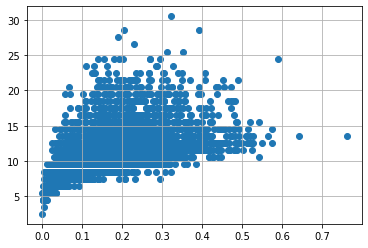

In [ ]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [ ]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

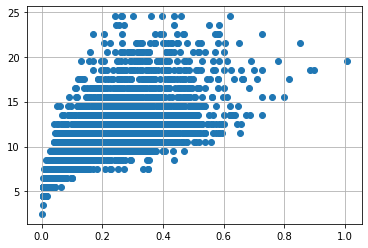

In [ ]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)
#Outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

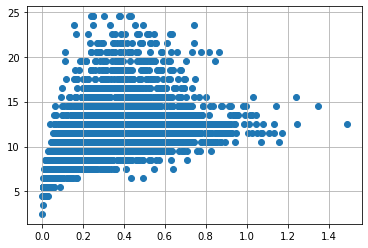

In [ ]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

#Outlier removal
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

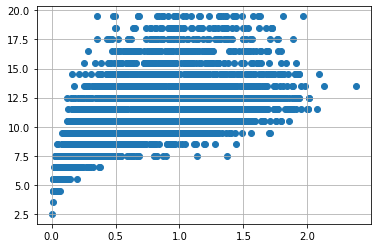

In [ ]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

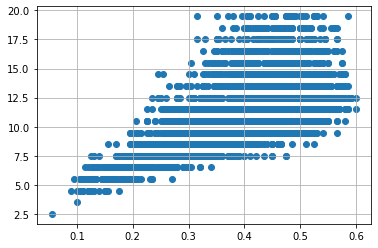

In [ ]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

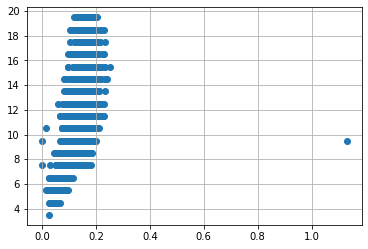

In [ ]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)



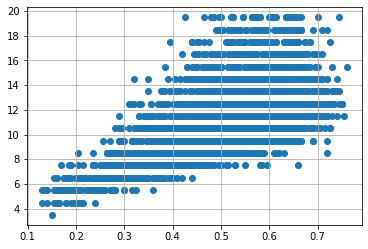

In [ ]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

7.Categorical columns

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:

categorical_features

Index([], dtype='object')

ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())

0.575    93
0.625    91
0.580    89
0.550    89
0.620    83
         ..
0.220     2
0.150     1
0.755     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


8.Split the dependent and independent variables

In [ ]:
x=df.iloc[:,:5]
x

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [ ]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


10.Train , Test , Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

11.Model building 

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

12 , 13 Train and Test the model

In [ ]:
x_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
345,0.490,0.390,0.140,0.7070,0.2795
3320,0.535,0.425,0.155,0.7765,0.3020
46,0.470,0.370,0.120,0.5795,0.2930
2002,0.360,0.270,0.085,0.1960,0.0905
3645,0.475,0.335,0.100,0.4425,0.1895


In [ ]:
y_test[0:5]

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
345,0.2185,0.180,14.5,0,0,1
3320,0.1565,0.250,17.5,1,0,0
46,0.2270,0.140,10.5,0,0,1
2002,0.0340,0.053,8.5,0,1,0
3645,0.0860,0.135,10.5,0,1,0


9.Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [ ]:
mlrpred=mlr.predict(x_test[0:9])

In [ ]:
mlrpred

array([[ 0.15632793,  0.21882437, 11.67127294,  0.33804203,  0.32128713,
         0.34067084],
       [ 0.17350421,  0.24628825, 12.54757299,  0.3891073 ,  0.24890446,
         0.36198824],
       [ 0.12203754,  0.15814635,  9.72613776,  0.22242903,  0.46319507,
         0.31437591],
       [ 0.04157729,  0.05978617,  8.56182214,  0.0919029 ,  0.71101114,
         0.19708596],
       [ 0.10104557,  0.12738237,  9.59525163,  0.14360564,  0.60899358,
         0.24740078],
       [ 0.19652306,  0.28723449, 13.3372994 ,  0.47112511,  0.13180261,
         0.39707228],
       [ 0.35619532,  0.45537823, 14.1983288 ,  0.58029385, -0.12890144,
         0.5486076 ],
       [ 0.1895344 ,  0.24807817, 11.36214847,  0.31908339,  0.31817   ,
         0.36274661],
       [ 0.10679521,  0.14747591, 10.969149  ,  0.25485324,  0.44270253,
         0.30244424]])

14. Measure the performance using metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

-3.029128134716346